In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def rank_by_type(group):
    group['ACC_Rank'] = group['ACC'].rank(ascending=False)
    group['MCC_Rank'] = group['MCC'].rank(ascending=False)
    group['AUPR_Rank'] = group['AUPR'].rank(ascending=False)
    group['AUC_Rank'] = group['AUC'].rank(ascending=False)
    return group
def name_process(x):
    if 'iAMP' in x  or 'Nishant' in x or 'Sharma' in x:
        x = x.split('_')[0] + x.split('_')[1]
    elif 'MAMP' in x:
        x =   x.split('_')[0] + x.split('_')[2] 
    else:
        x = x.split('_')[0]
    return x
def results_plot(df,type='Classification',group='Single'):
    sns.set_style("whitegrid")
    if group == 'Single':
        # Create a new figure and set the subfigure layout
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

        # Draw a box plot
        sns.boxplot(data=df[df['Type']==type], x='Name', y='ACC_Rank', ax=axes[0, 0], color='#b3e2cd')
        sns.boxplot(data=df[df['Type']==type], x='Name', y='MCC_Rank', ax=axes[0, 1], color='#fdcdac')
        sns.boxplot(data=df[df['Type']==type], x='Name', y='AUPR_Rank', ax=axes[1, 0], color='#cbd5e8')
        sns.boxplot(data=df[df['Type']==type], x='Name', y='AUC_Rank', ax=axes[1, 1], color='#f4cae4')
    elif group=='Double':
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
        # Draw a box plot
        sns.boxplot(data=df, x='Name', hue='Type',y='ACC_Rank', ax=axes[0, 0], palette={'CLS': '#cbd5e8', 'Mean':'#b3e2cd'})
        handles, labels = axes[0, 0].get_legend_handles_labels()
        #ax.legend(handles, labels, loc='upper right')  # Adjust the position of the legend as needed
        axes[0, 0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to control the position of the legend

        sns.boxplot(data=df, x='Name', hue='Type',y='MCC_Rank', ax=axes[0, 1], palette={'CLS': '#cbd5e8', 'Mean':'#fdcdac'})
        handles, labels = axes[0, 1].get_legend_handles_labels()
        #ax.legend(handles, labels, loc='upper right')  # Adjust the position of the legend as needed
        axes[0, 1].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to control the position of the legend
            
        sns.boxplot(data=df, x='Name', hue='Type',y='AUPR_Rank', ax=axes[1, 0], palette={'CLS': '#cbd5e8', 'Mean':'#f4cae4'})
        handles, labels = axes[1, 0].get_legend_handles_labels()
        #ax.legend(handles, labels, loc='upper right')  # Adjust the position of the legend as needed
        axes[1, 0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to control the position of the legend

        sns.boxplot(data=df, x='Name', hue='Type',y='AUC_Rank', ax=axes[1, 1], palette={'CLS': '#cbd5e8', 'Mean':'#e6f5c9'})
        handles, labels = axes[1, 1].get_legend_handles_labels()
        #ax.legend(handles, labels, loc='upper right')  # Adjust the position of the legend as needed
        axes[1, 1].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to control the position of the legend
        
        
        
        '''
        for ax in axes.flat:
            #ax.legend(handles, labels, loc='upper right')  # Adjust the position of the legend as needed
            ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to control the position of the legend
        '''
        
    else:
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(26, 12))
        # Draw a box plot
        sns.boxplot(data=df, x='Name', hue='Type',y='ACC_Rank', ax=axes[0, 0], palette={'CLS': '#fdb863', 'Mean':'#b2abd2','Weight':'#92c5de'})
        handles, labels = axes[0, 0].get_legend_handles_labels()
        #ax.legend(handles, labels, loc='upper right')  # Adjust the position of the legend as needed
        axes[0, 0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to control the position of the legend


        sns.boxplot(data=df, x='Name', hue='Type',y='MCC_Rank', ax=axes[0, 1], palette={'CLS': '#fdb863', 'Mean':'#b2abd2','Weight':'#92c5de'})
        handles, labels = axes[0, 1].get_legend_handles_labels()
        #ax.legend(handles, labels, loc='upper right')  # Adjust the position of the legend as needed
        axes[0, 1].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to control the position of the legend


        sns.boxplot(data=df, x='Name', hue='Type',y='AUPR_Rank', ax=axes[1, 0],palette={'CLS': '#fdb863', 'Mean':'#b2abd2','Weight':'#92c5de'})
        handles, labels = axes[1, 0].get_legend_handles_labels()
        #ax.legend(handles, labels, loc='upper right')  # Adjust the position of the legend as needed
        axes[1, 0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to control the position of the legend


        sns.boxplot(data=df, x='Name', hue='Type',y='AUC_Rank', ax=axes[1, 1], palette={'CLS': '#fdb863', 'Mean':'#b2abd2','Weight':'#92c5de'})
        handles, labels = axes[1, 1].get_legend_handles_labels()
        #ax.legend(handles, labels, loc='upper right')  # Adjust the position of the legend as needed
        axes[1, 1].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to control the position of the legend
        
        

    # Set the title and label of each subplot
    axes[0, 0].set_title('ACC_Rank Distribution by Model')
    axes[0, 0].set_xlabel('Model Name')
    axes[0, 0].set_ylabel('ACC_Rank')

    axes[0, 1].set_title('MCC_Rank Distribution by Model')
    axes[0, 1].set_xlabel('Model Name')
    axes[0, 1].set_ylabel('MCC_Rank')

    axes[1, 0].set_title('AUPR_Rank Distribution by Model')
    axes[1, 0].set_xlabel('Model Name')
    axes[1, 0].set_ylabel('AUPR_Rank')

    axes[1, 1].set_title('AUC_Rank Distribution by Model')
    axes[1, 1].set_xlabel('Model Name')
    axes[1, 1].set_ylabel('AUC_Rank')

    # Rotate x-axis label
    axes[0, 0].tick_params(axis='x', rotation=90)
    axes[0, 1].tick_params(axis='x', rotation=90)
    axes[1, 0].tick_params(axis='x', rotation=90)
    axes[1, 1].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
df = pd.read_csv("./results/statistic_results_none_CLS_Mean.csv",header=None)
df1= pd.read_csv("./results/statistic_results_none_weighted.csv",header=None)
df.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df1.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df = pd.concat([df,df1],axis=0)
df['Dataset'] = df['Name'].apply(lambda x: name_process(x))
df['Name'] = df['Name'].str.extract(r'_(.*)$')
df['Type'] = df['Type'].replace('Classification', 'CLS')
df['Name'] = np.where(df['Name'].str.contains('balance'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('balance'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AVP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('ABP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('Deep_AMP' ), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AMP' ), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AFP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df = df.groupby(['Dataset', 'Type']).apply(rank_by_type)
df.to_csv("Results_CLS_Mean_Weighted_rank.csv")

/var/folders/px/0q9p9mmx1gg50s98x7gxjmg00000gn/T/ipykernel_81031/3616000527.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Dataset', 'Type']).apply(rank_by_type)


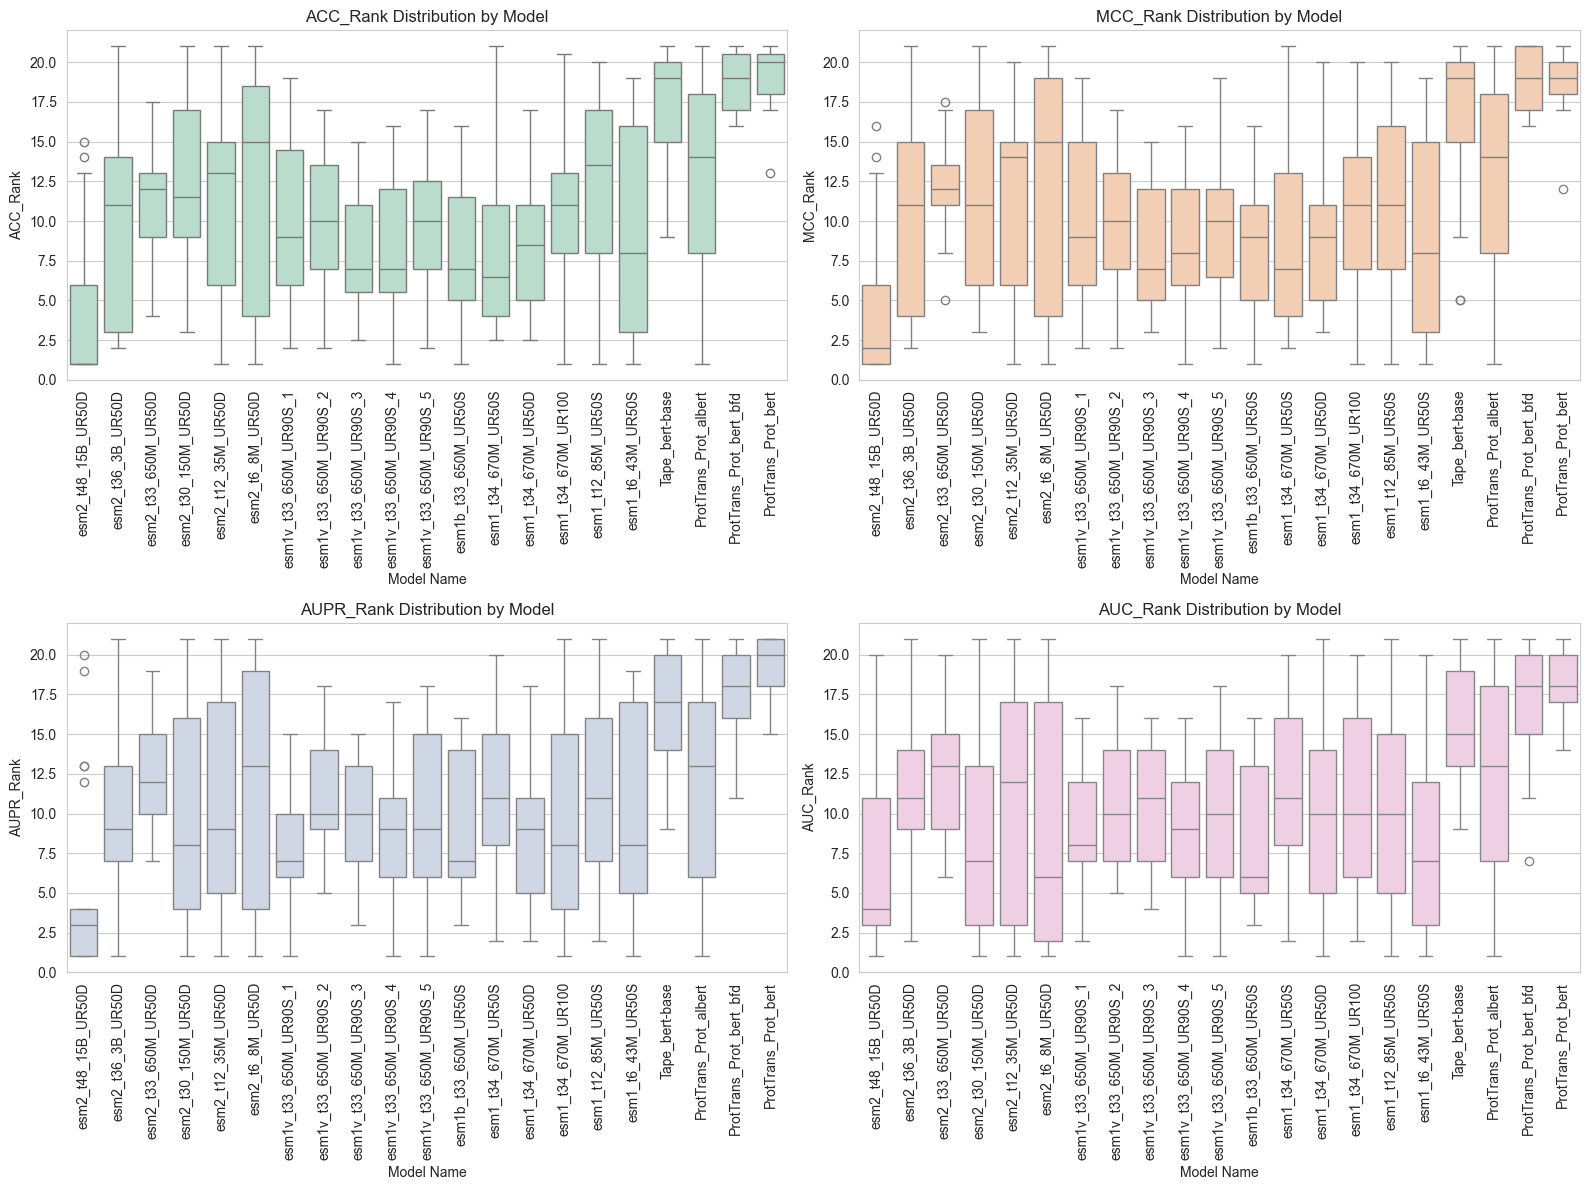

In [57]:
results_plot(df,type="CLS",group='Single')

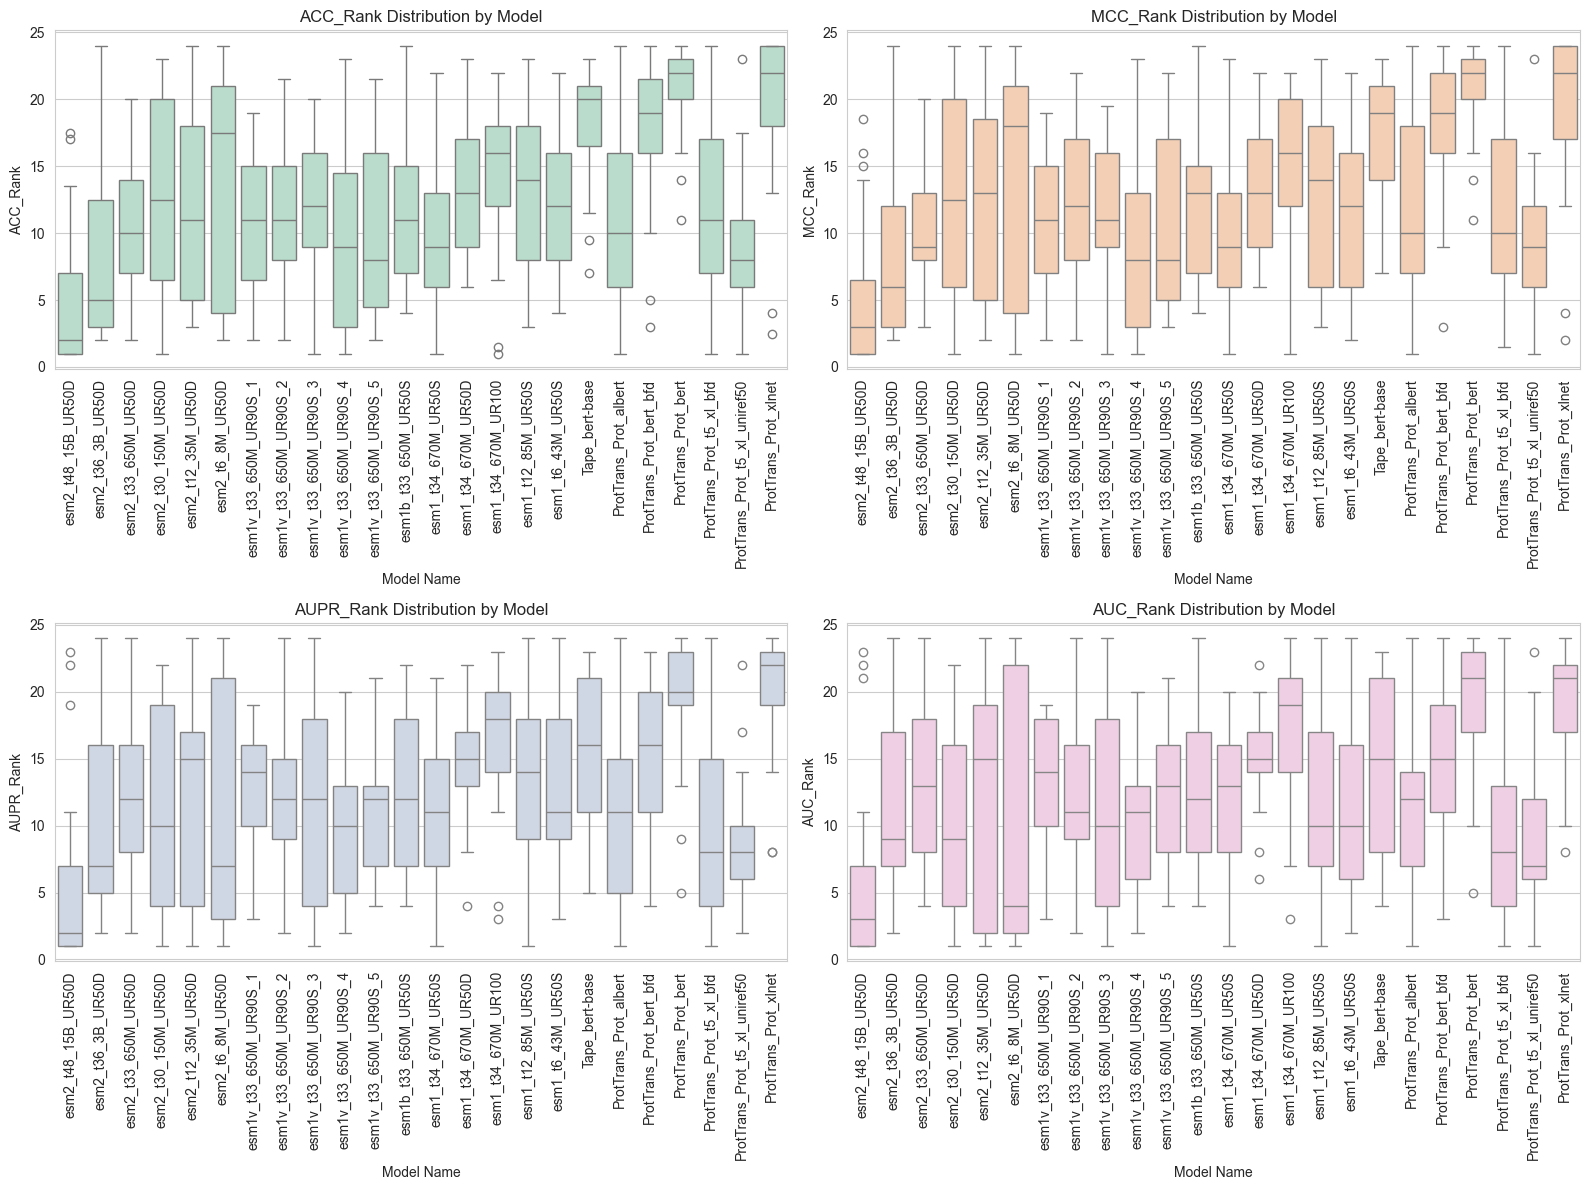

In [58]:
results_plot(df,type="Mean",group='Single')

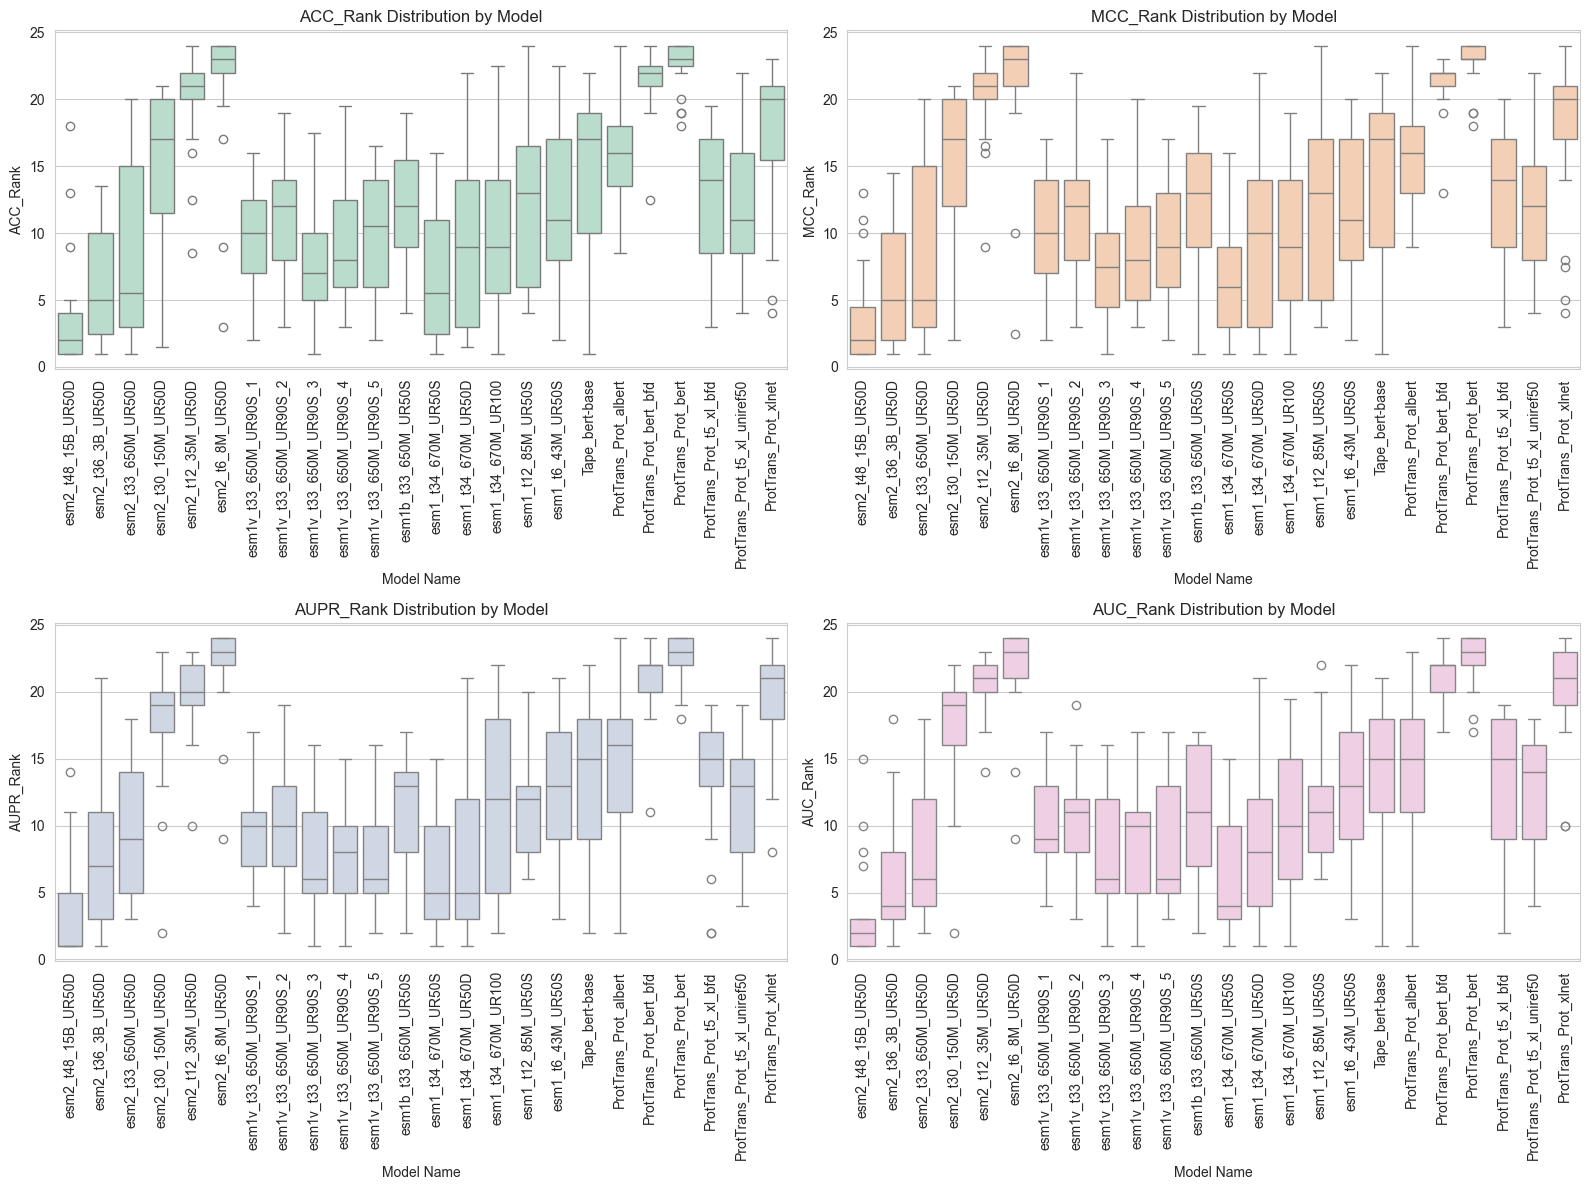

In [59]:
results_plot(df,type="Weight",group='Single')

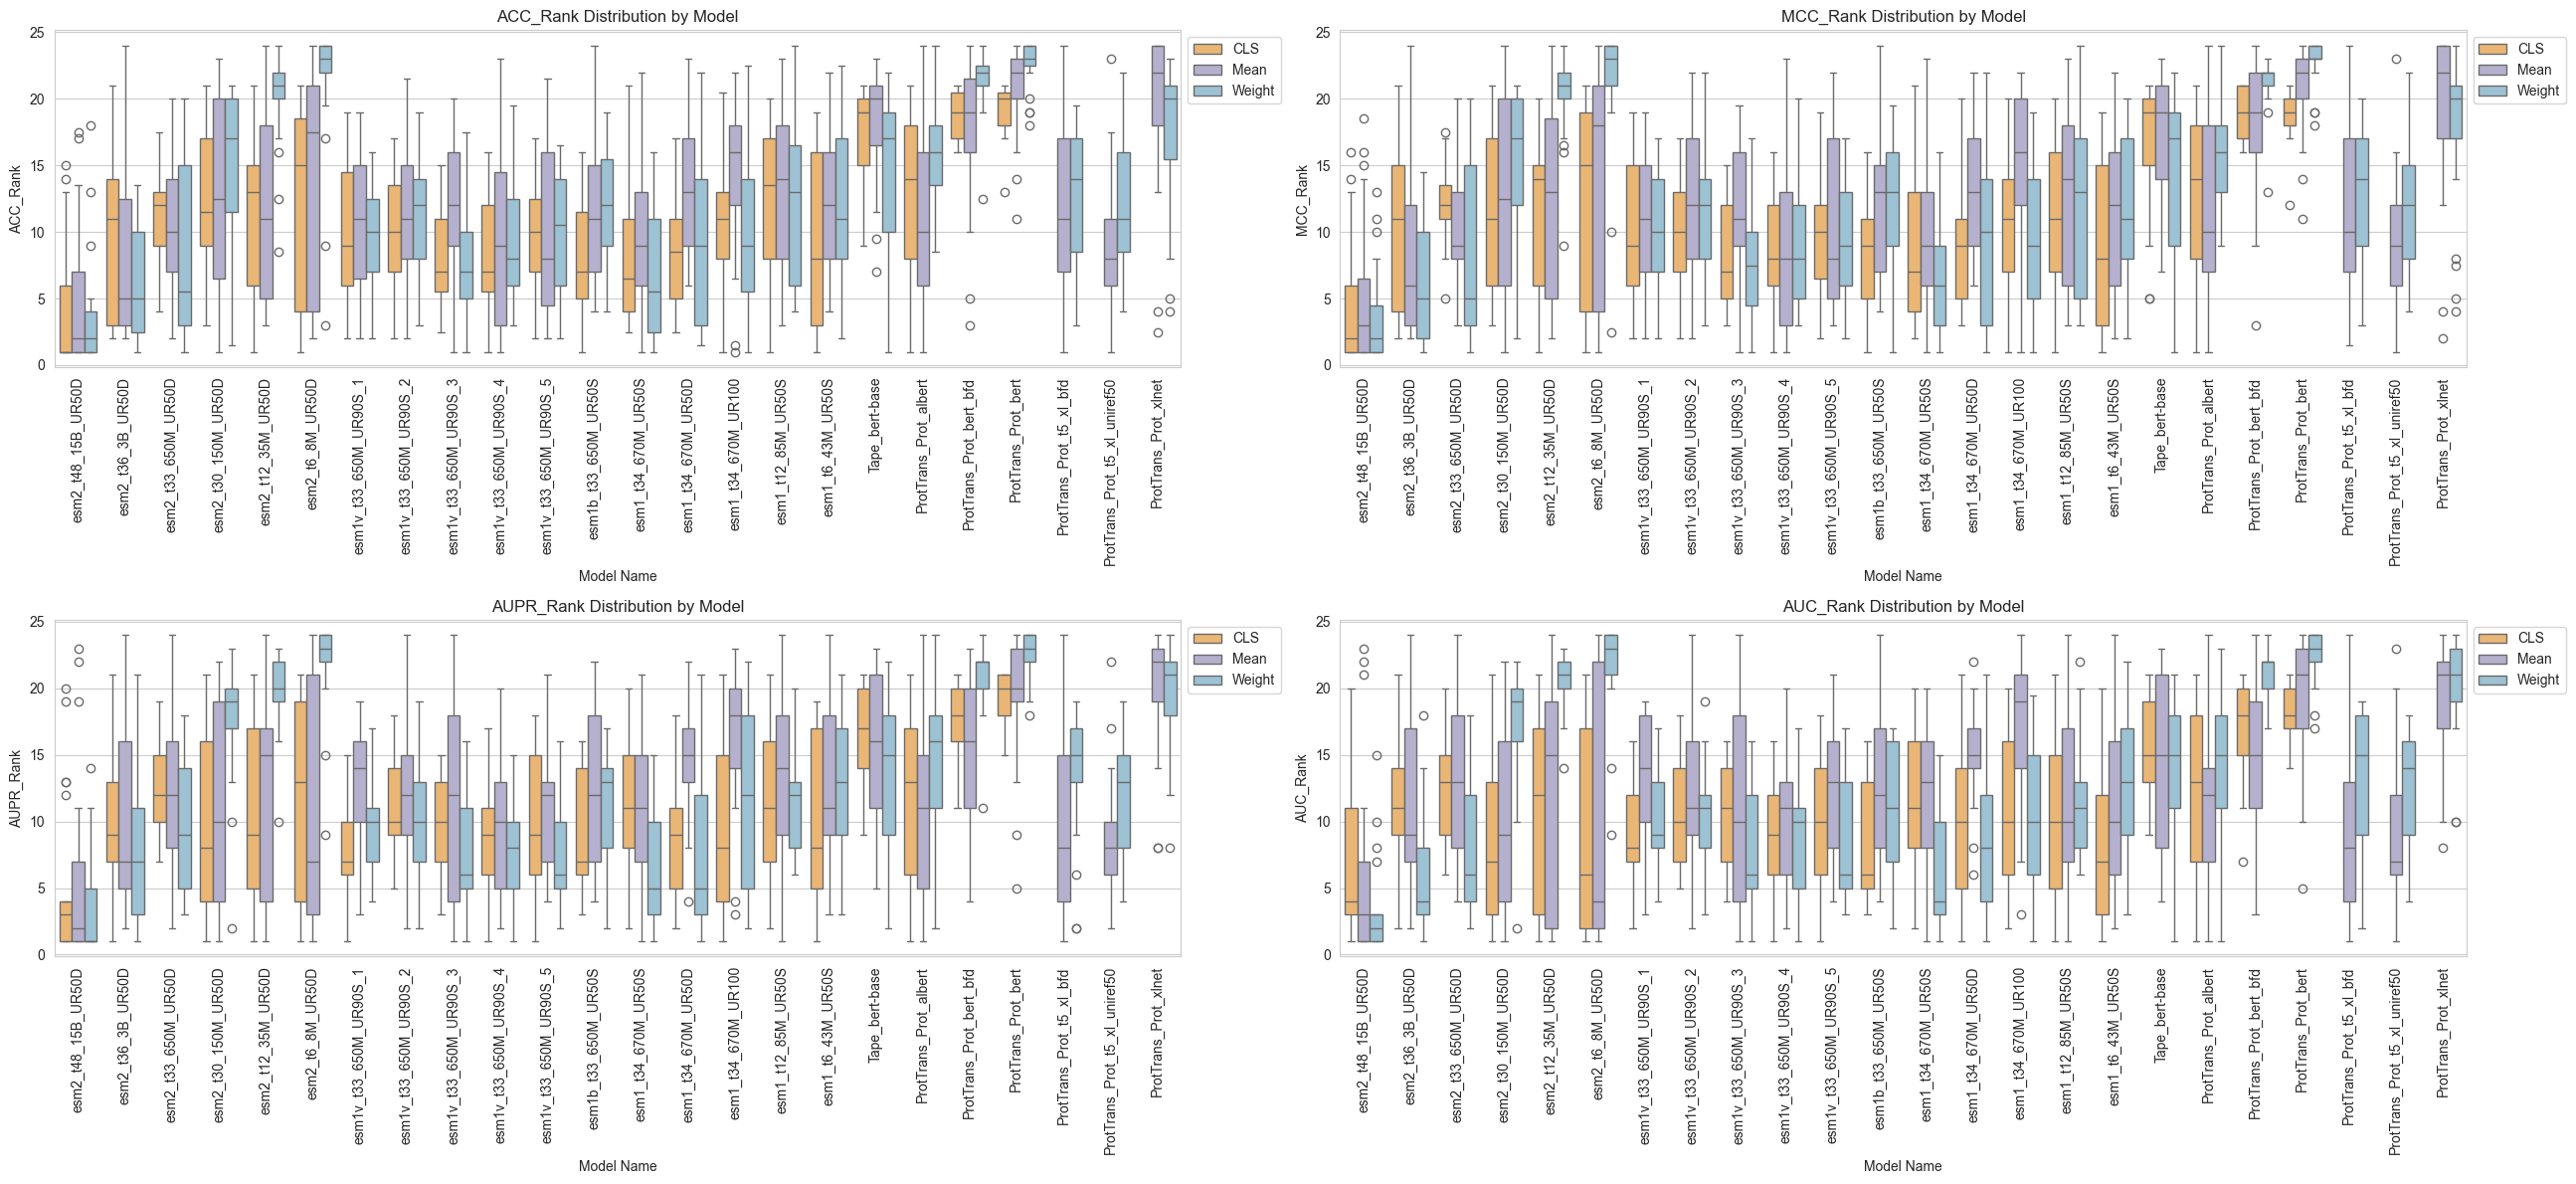

In [60]:
results_plot(df,type="Classification",group='')

/var/folders/px/0q9p9mmx1gg50s98x7gxjmg00000gn/T/ipykernel_81031/773822387.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Dataset',]).apply(rank_by_type)


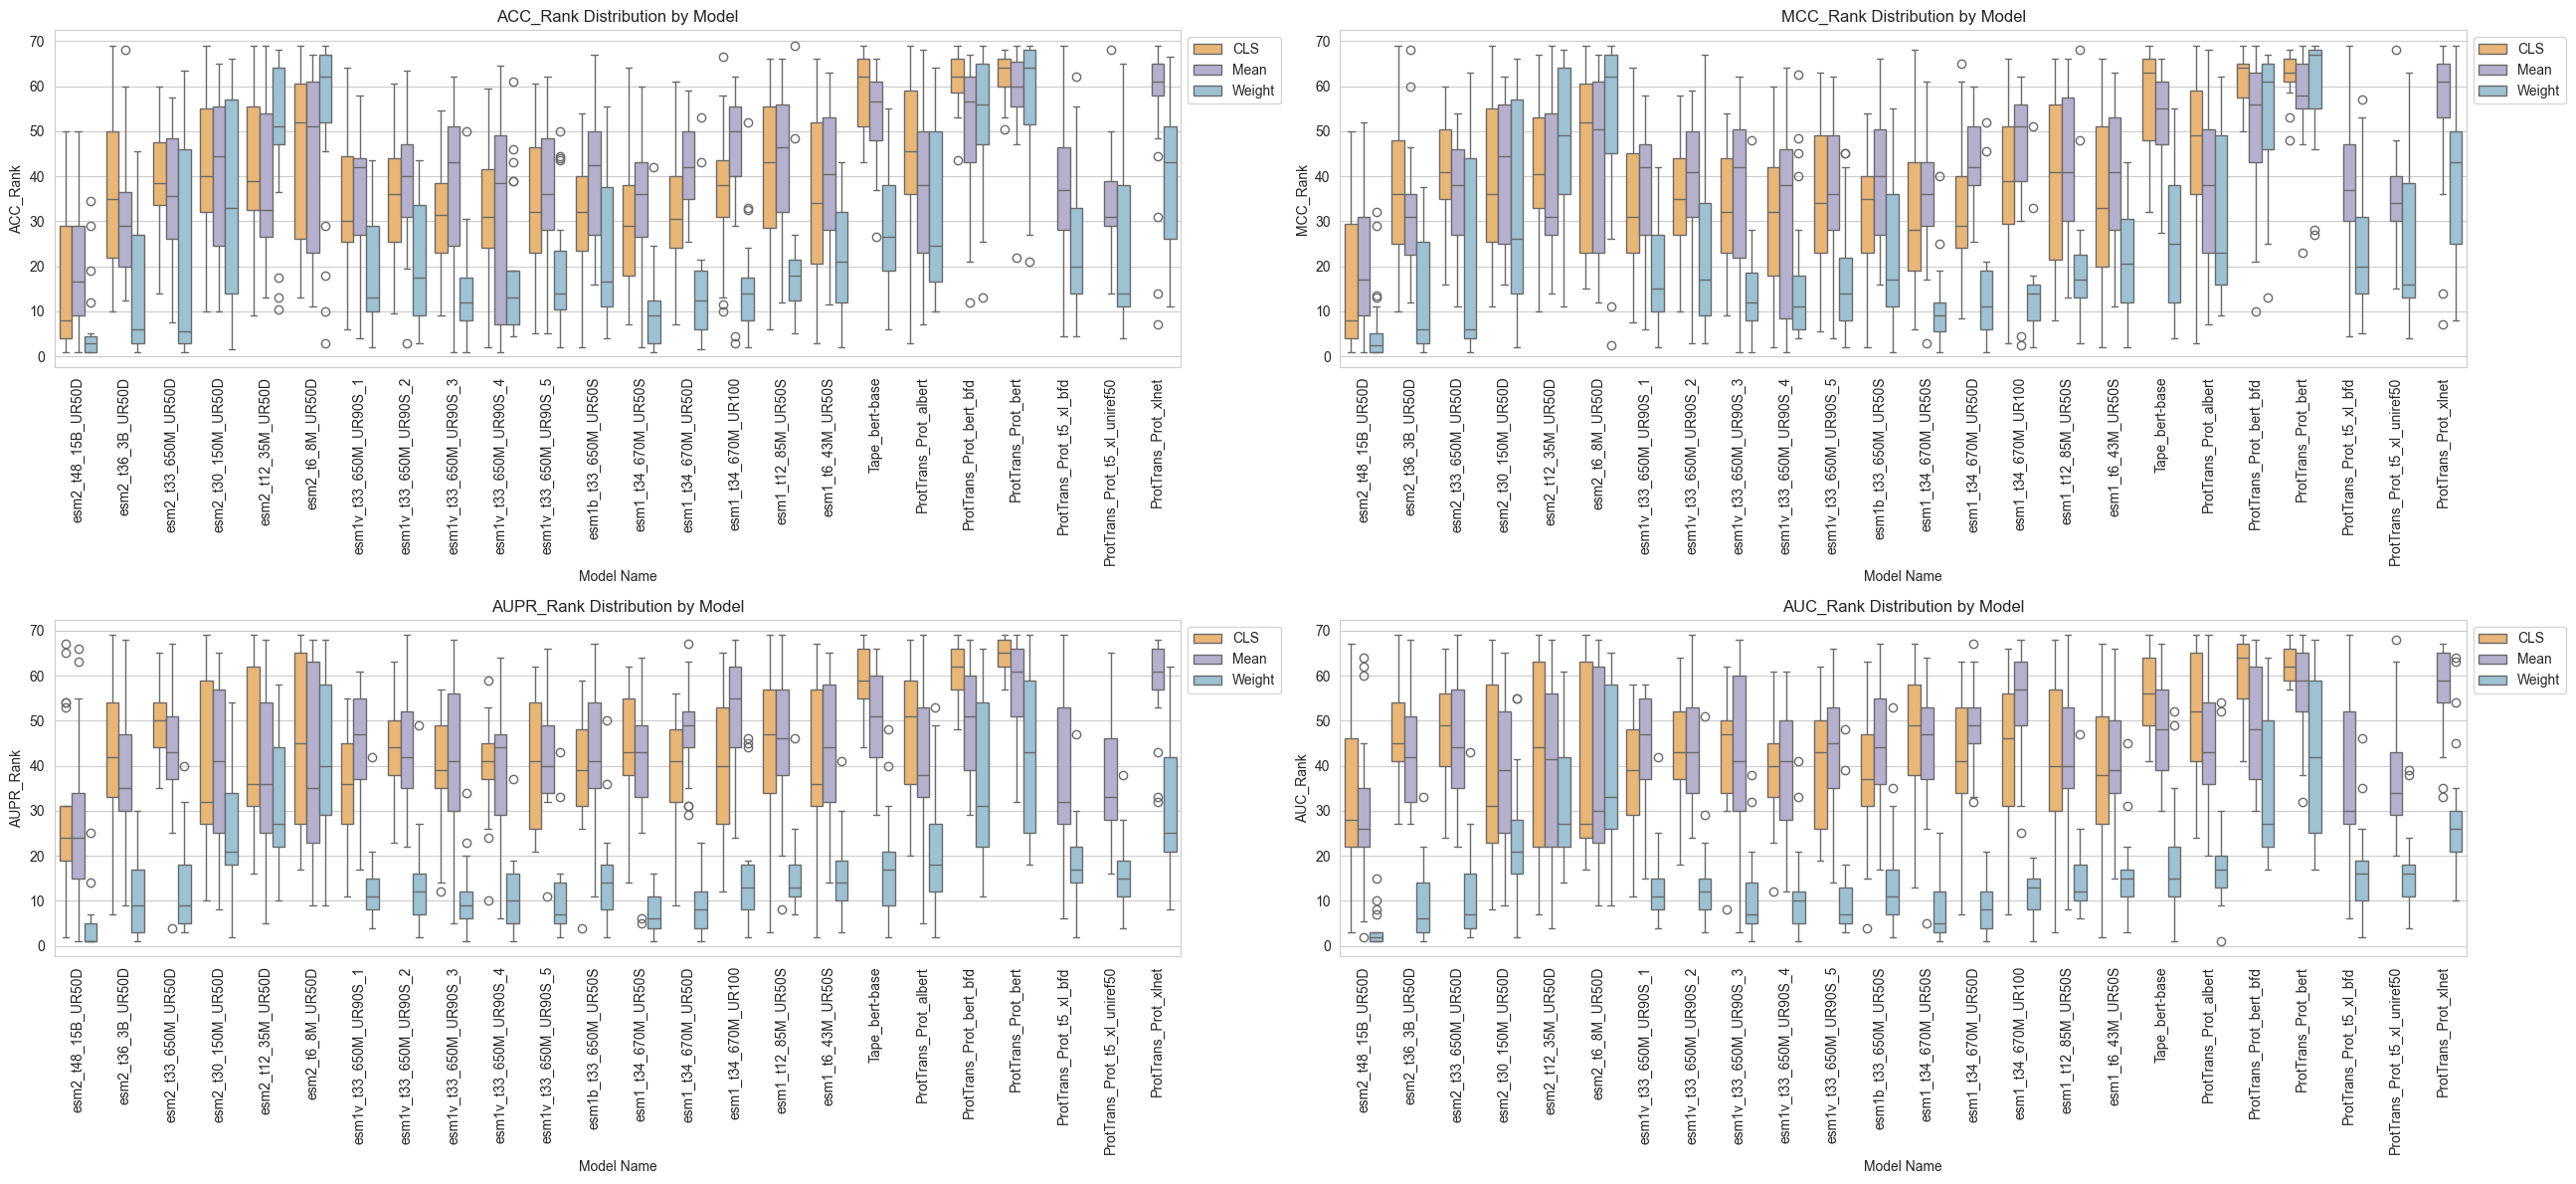

In [63]:
df.reset_index(drop=True, inplace=True)
df = df.groupby(['Dataset',]).apply(rank_by_type)
df.to_csv("Results_rank_together.csv")
results_plot(df,type="Classification",group='')

In [ ]:
df = df.loc[:, ['Name', 'Type', 'ACC_Rank','MCC_Rank','AUPR_Rank','AUC_Rank']]
results_plot(df,type="Classification",group='Single')

/var/folders/px/0q9p9mmx1gg50s98x7gxjmg00000gn/T/ipykernel_49782/1427977981.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Dataset',]).apply(rank_by_type)


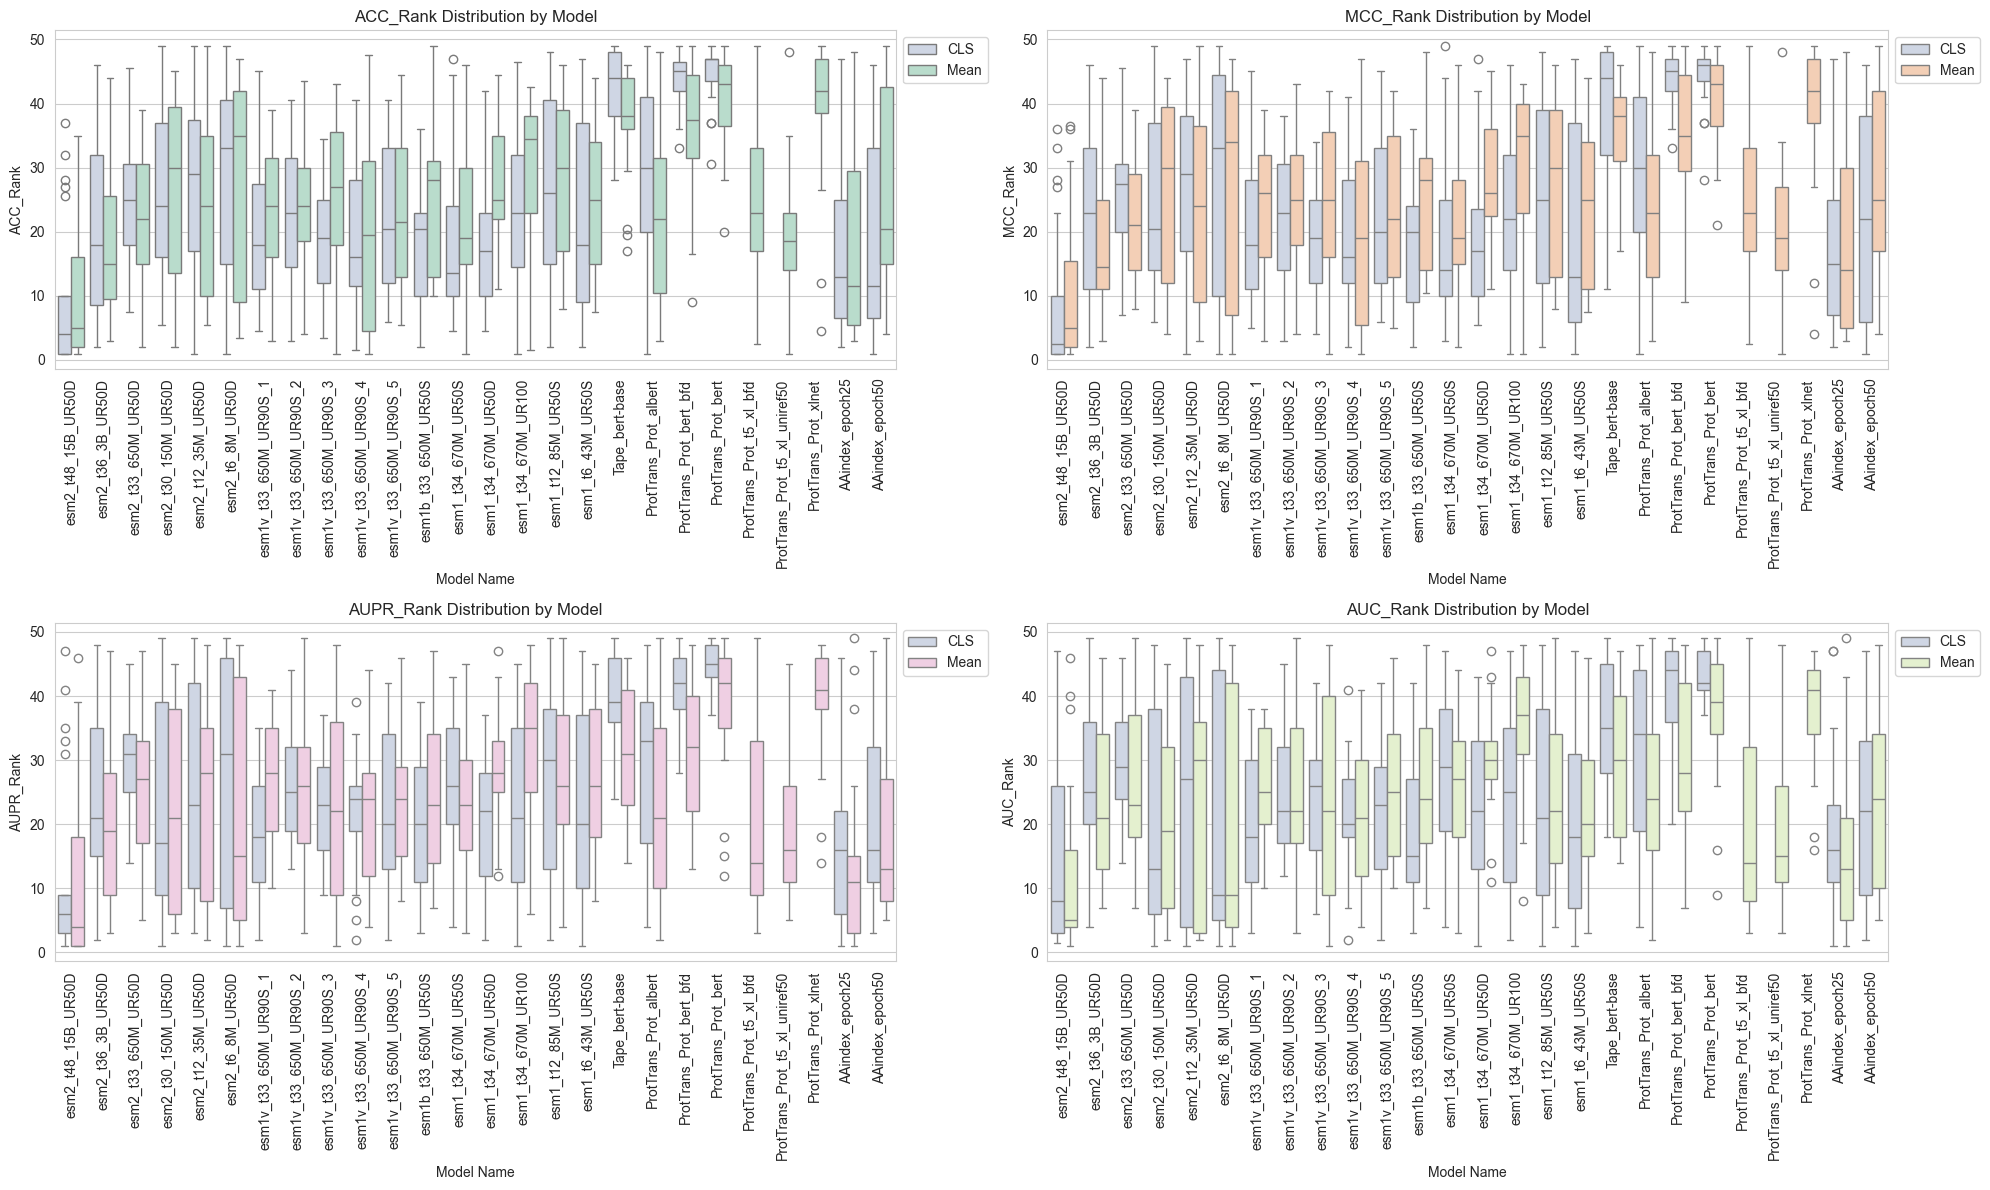

In [ ]:
import pandas as pd
df  = pd.read_csv("./results/statistic_results_none_All.csv",header=None)
df1 = pd.read_csv("./results/AAindex_statistic_results_none_all.csv",header=None)
df.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df1.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df=pd.concat((df,df1),axis=0)
df['Dataset'] = df['Name'].apply(lambda x: name_process(x))
df['Name'] = df['Name'].str.extract(r'_(.*)$')
df['Type'] = df['Type'].replace('Classification', 'CLS')
df['Name'] = np.where(df['Name'].str.contains('balance'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('balance'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AVP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('ABP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('Deep_AMP' ), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AMP' ), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AFP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df = df.groupby(['Dataset',]).apply(rank_by_type)
results_plot(df,type="Mean",group='Double')

/var/folders/px/0q9p9mmx1gg50s98x7gxjmg00000gn/T/ipykernel_81031/2079589710.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Name'] = df1['Name'].replace(['esm2_t36_3B_UR50D', 'AAindex_epoch25F', 'AAindex_epoch50F', 'AAindex_epoch25P', 'AAindex_epoch50P'], ['ESM2_36', 'AAE25_unfrezze', 'AAE50_unfrezze', 'AAE25_frezze', 'AAE50_frezze'])
/var/folders/px/0q9p9mmx1gg50s98x7gxjmg00000gn/T/ipykernel_81031/2079589710.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence t

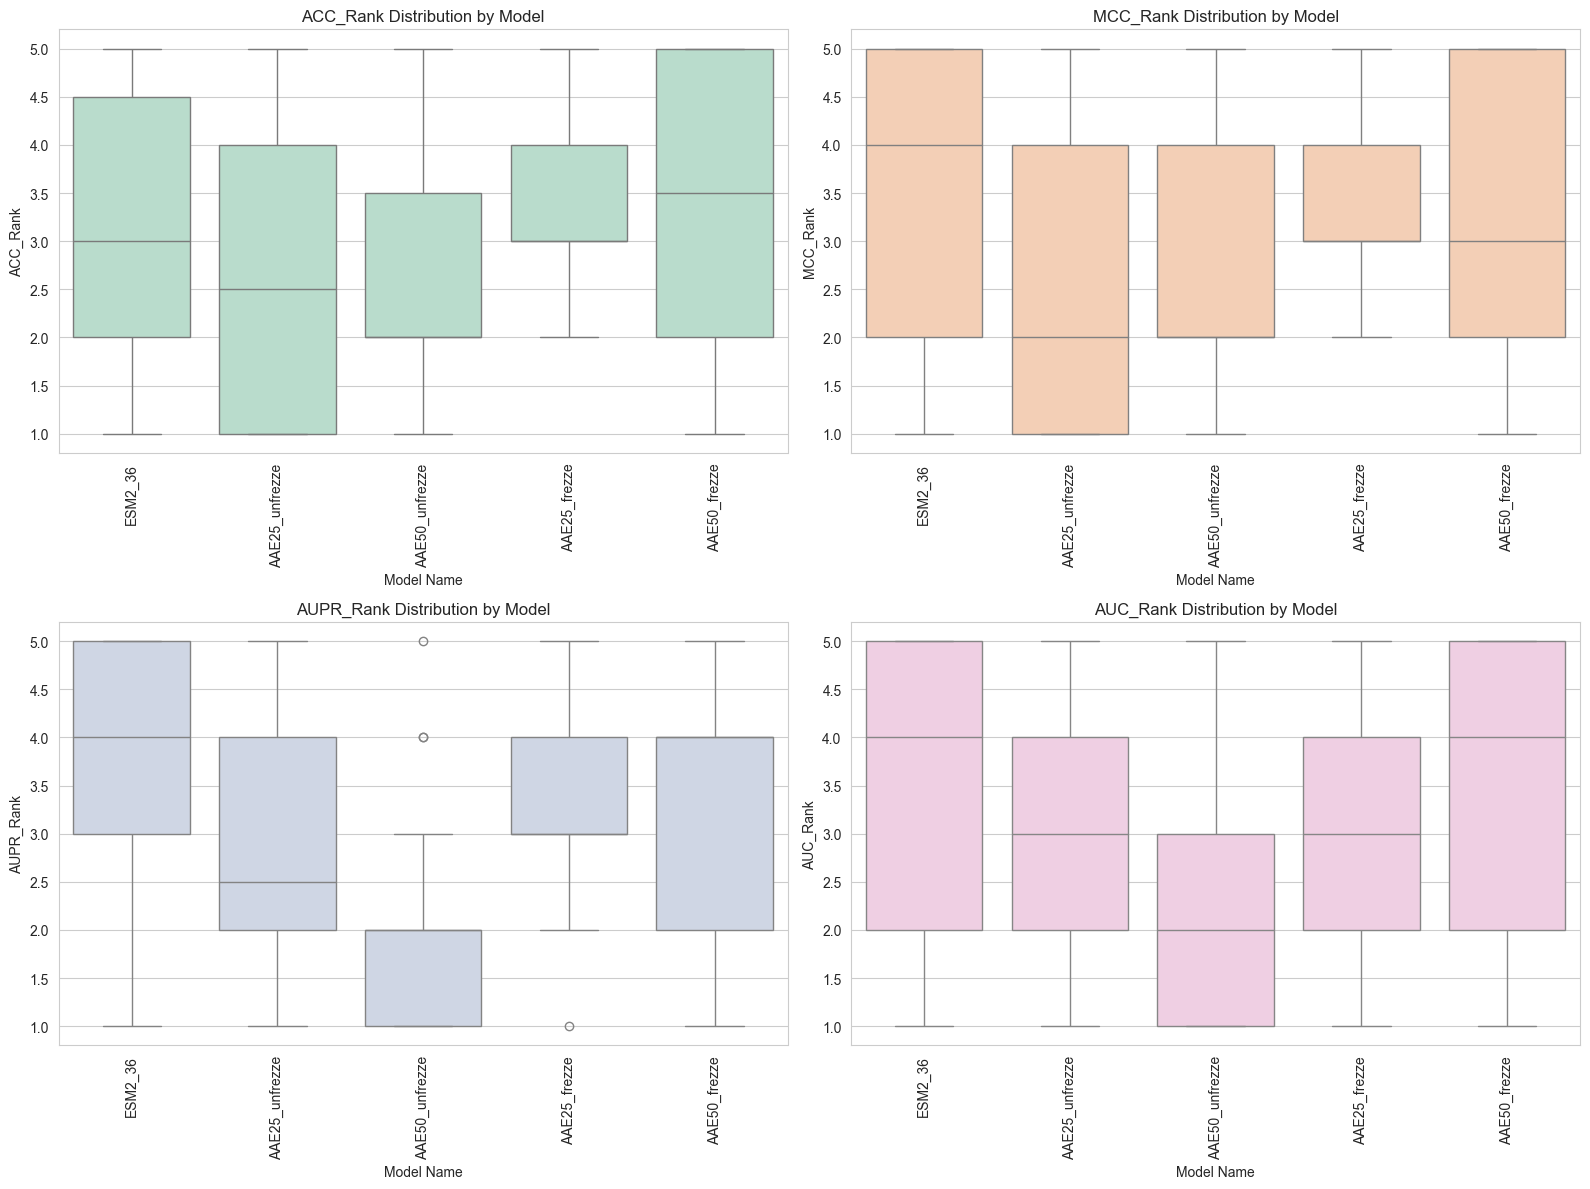

In [ ]:
df = pd.read_csv("./results/statistic_results_none_CLS_Mean.csv")
df1 = pd.read_csv("./results/AAindex_statistic_results_none_CLS_Mean_rename.csv")
df2 = pd.read_csv("./results/statistic_results_none_weighted.csv")
df3 = pd.read_csv("./results/AAindex_statistic_results_none_weighted_rename.csv")
df.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df1.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df2.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df3.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df=pd.concat((df,df1,df2,df3),axis=0)
df['Dataset'] = df['Name'].apply(lambda x: name_process(x))
df['Name'] = df['Name'].str.extract(r'_(.*)$')
df['Type'] = df['Type'].replace('Classification', 'CLS')
df['Name'] = np.where(df['Name'].str.contains('balance'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('balance'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AVP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('ABP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('Deep_AMP' ), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AMP' ), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AFP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
#df=df[df['Name'].isin(['esm2_t48_15B_UR50D','esm2_t36_3B_UR50D','AAindex_epoch25','AAindex_epoch50'])]
df1=df[df['Name'].isin(['esm2_t36_3B_UR50D','AAindex_epoch25F','AAindex_epoch50F','AAindex_epoch25P','AAindex_epoch50P'])]
df1['Name'] = df1['Name'].replace(['esm2_t36_3B_UR50D', 'AAindex_epoch25F', 'AAindex_epoch50F', 'AAindex_epoch25P', 'AAindex_epoch50P'], ['ESM2_36', 'AAE25_unfrezze', 'AAE50_unfrezze', 'AAE25_frezze', 'AAE50_frezze'])
new_order = ['ESM2_36', 'AAE25_unfrezze', 'AAE50_unfrezze', 'AAE25_frezze', 'AAE50_frezze']
df1 = df1.sort_values(by='Name', key=lambda x: [new_order.index(name) for name in x])
#df = df.groupby(['Dataset',]).apply(rank_by_type)
df1 = df1.groupby(['Dataset', 'Type']).apply(rank_by_type)
#results_plot(df,type="Mean",group='Double')
results_plot(df1,type="CLS",group='Single')

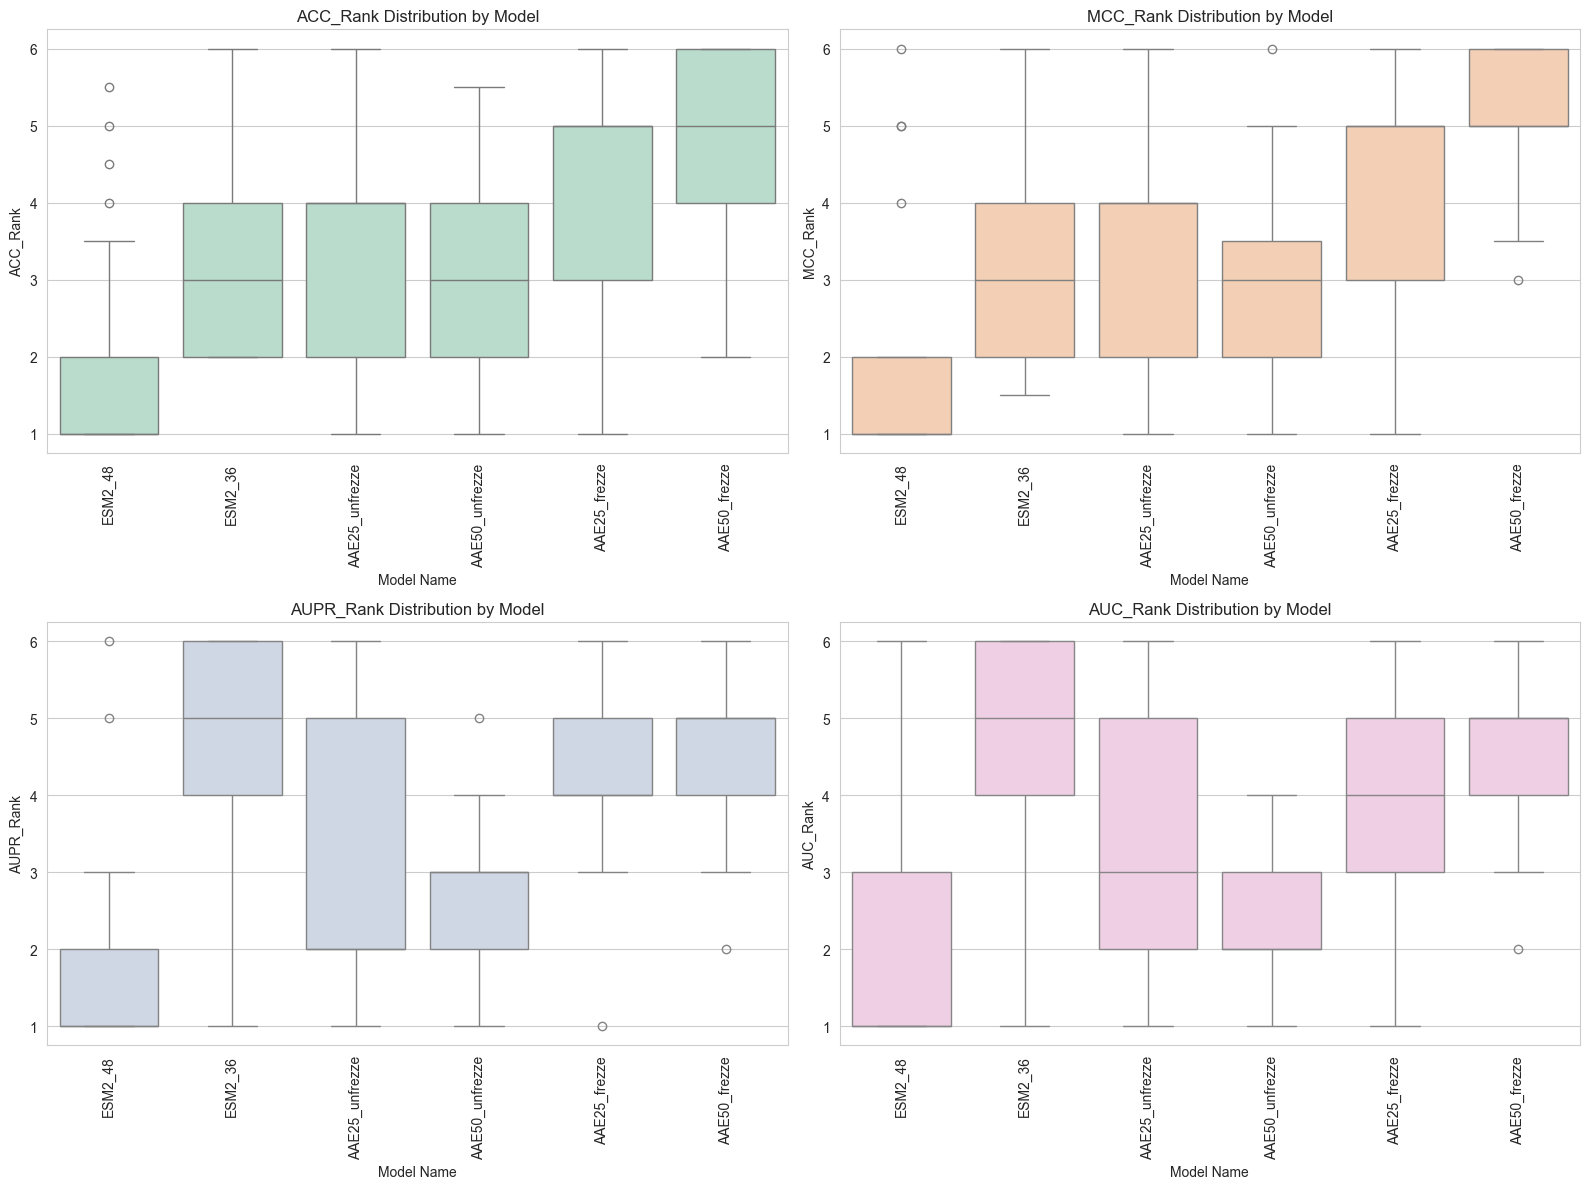

In [109]:
results_plot(df1,type="Mean",group='Single')

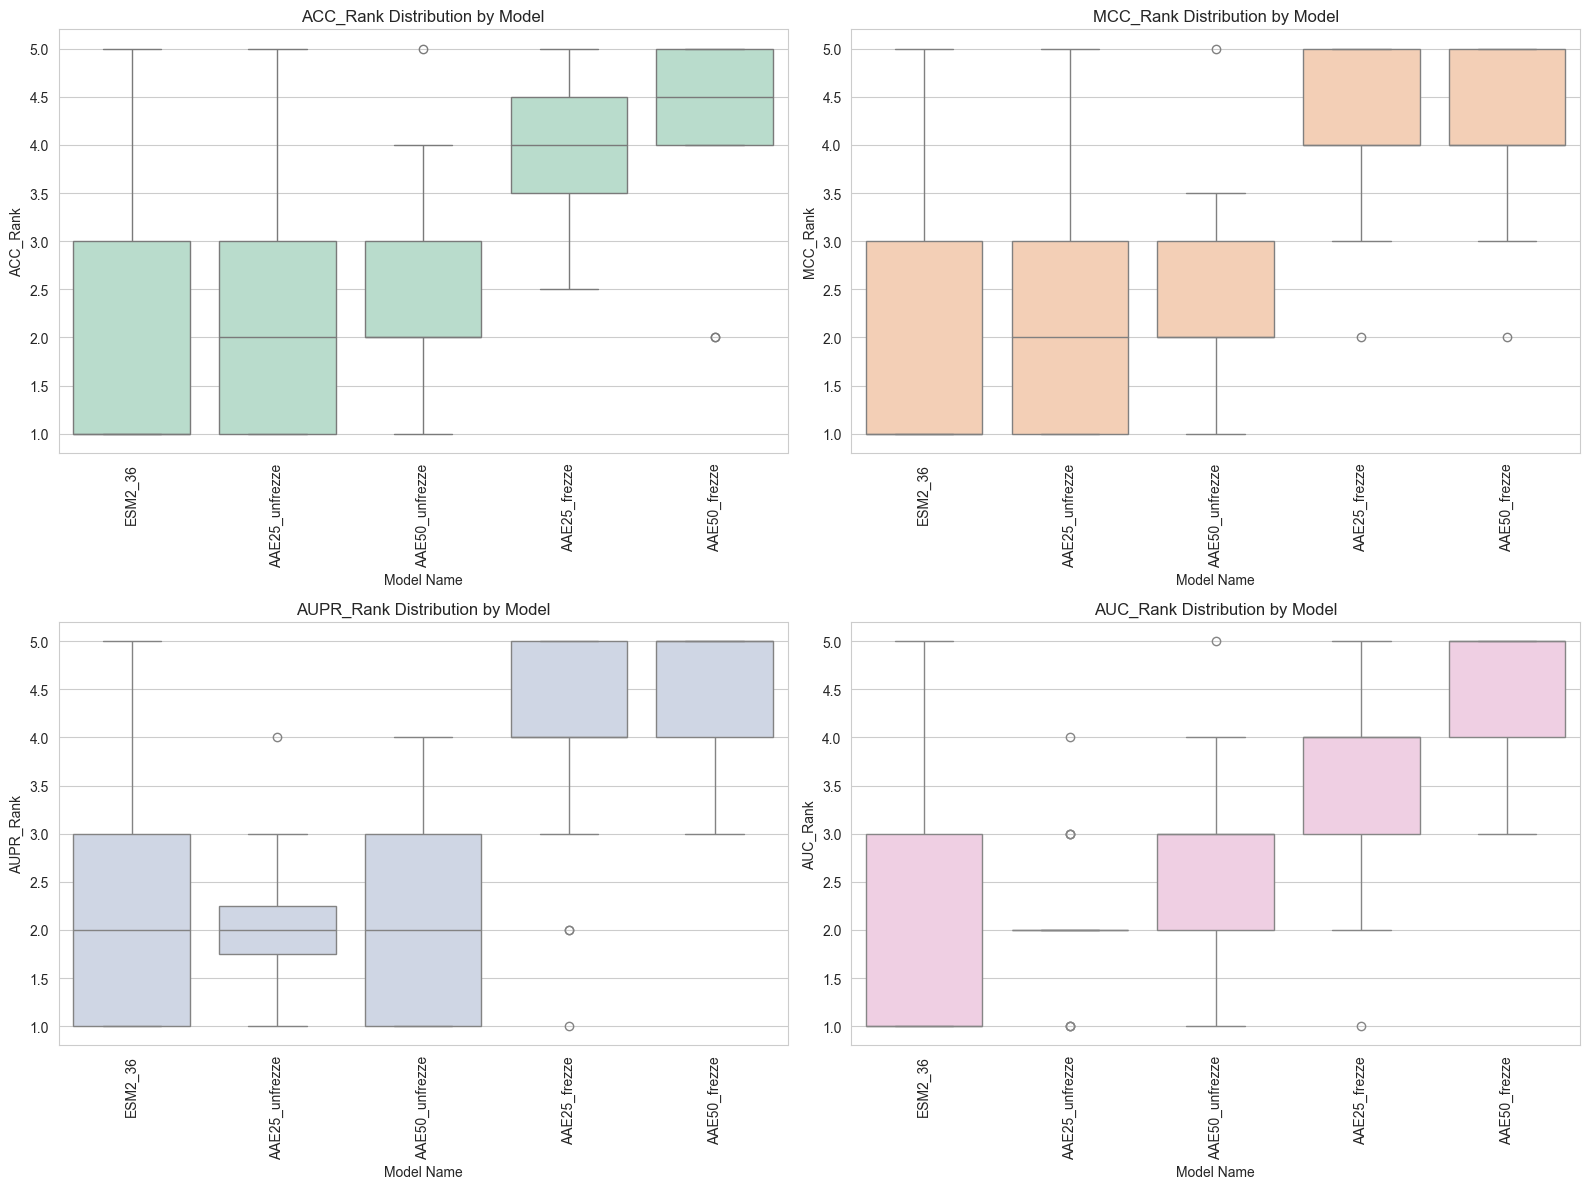

In [105]:
results_plot(df1,type="Weight",group='Single')

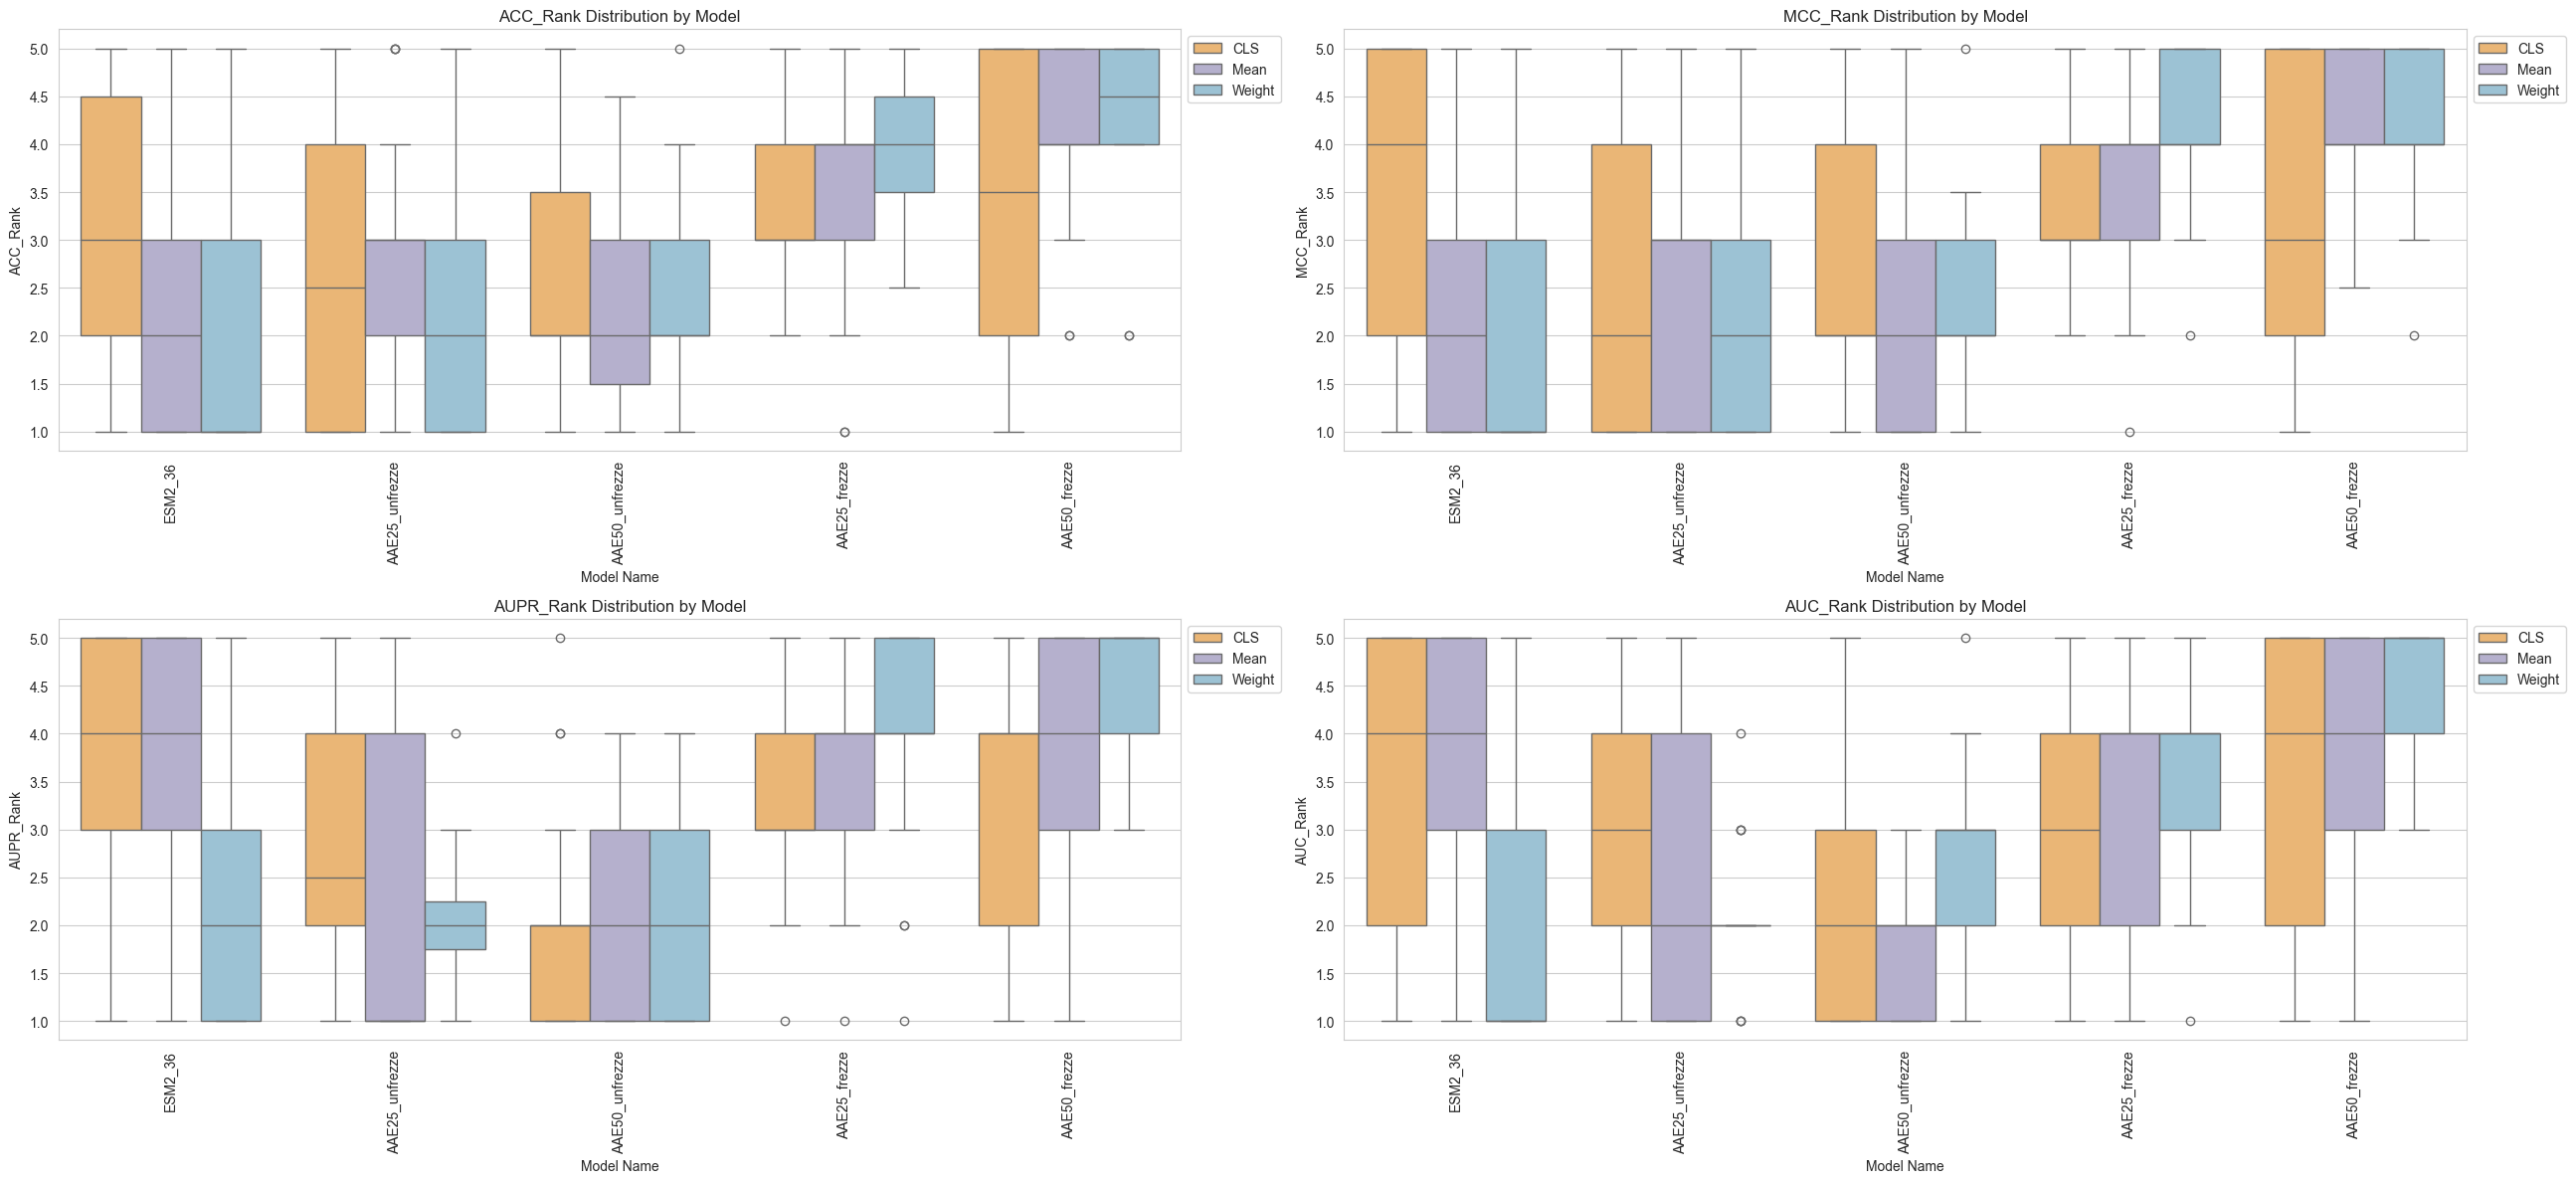

In [106]:
results_plot(df1,type="Weight",group='')

/var/folders/px/0q9p9mmx1gg50s98x7gxjmg00000gn/T/ipykernel_81031/1038117264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Name'] = df1['Name'].replace(['esm2_t48_15B_UR50D','esm2_t36_3B_UR50D', 'AAindex_epoch25F', 'AAindex_epoch50F', 'AAindex_epoch25P', 'AAindex_epoch50P'], ['ESM2_48','ESM2_36', 'AAE25_unfrezze', 'AAE50_unfrezze', 'AAE25_frezze', 'AAE50_frezze'])
/var/folders/px/0q9p9mmx1gg50s98x7gxjmg00000gn/T/ipykernel_81031/1038117264.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping colum

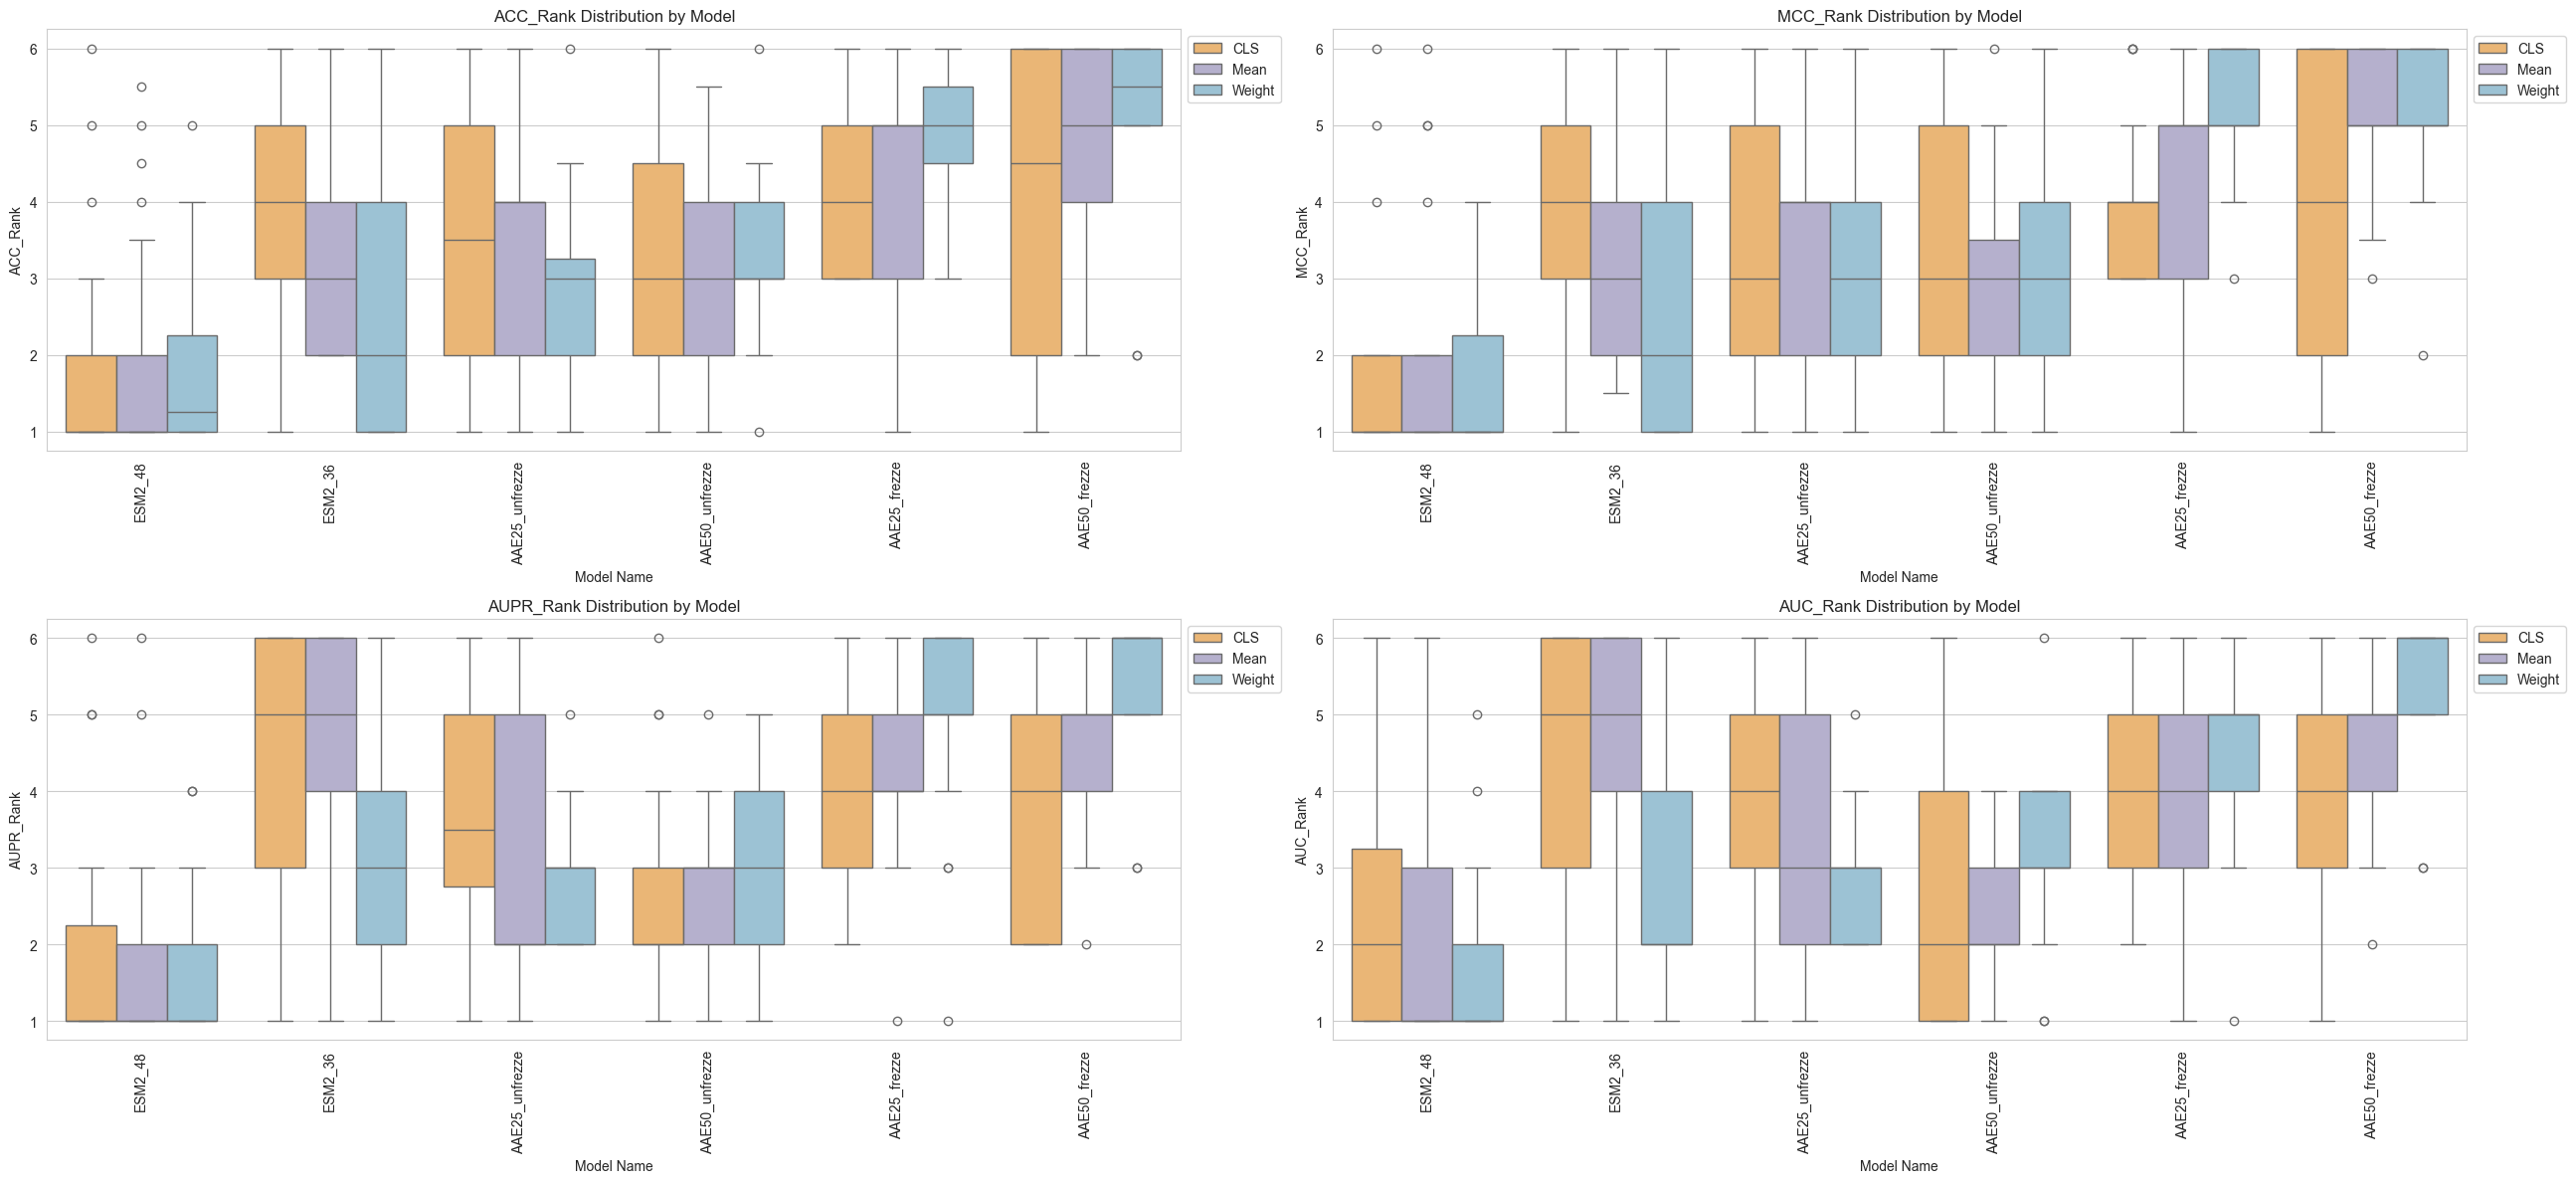

In [108]:
df1=df[df['Name'].isin(['esm2_t48_15B_UR50D','esm2_t36_3B_UR50D','AAindex_epoch25F','AAindex_epoch50F','AAindex_epoch25P','AAindex_epoch50P'])]
df1['Name'] = df1['Name'].replace(['esm2_t48_15B_UR50D','esm2_t36_3B_UR50D', 'AAindex_epoch25F', 'AAindex_epoch50F', 'AAindex_epoch25P', 'AAindex_epoch50P'], ['ESM2_48','ESM2_36', 'AAE25_unfrezze', 'AAE50_unfrezze', 'AAE25_frezze', 'AAE50_frezze'])
new_order = ['ESM2_48','ESM2_36', 'AAE25_unfrezze', 'AAE50_unfrezze', 'AAE25_frezze', 'AAE50_frezze']
df1 = df1.sort_values(by='Name', key=lambda x: [new_order.index(name) for name in x])
#df = df.groupby(['Dataset',]).apply(rank_by_type)
df1 = df1.groupby(['Dataset', 'Type']).apply(rank_by_type)
#results_plot(df,type="Mean",group='Double')
results_plot(df1,type="Weight",group='')

In [ ]:
df = pd.read_csv("./results/statistic_results_none_CLS_Mean.csv")
df1 = pd.read_csv("./results/AAindex_statistic_results_none_CLS_Mean_rename.csv")
df2 = pd.read_csv('./results/statistic_results_none_weighted.csv')
df3 = pd.read_csv('./results/AAindex_statistic_results_none_weighted_rename.csv')
df.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df1.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df2.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df3.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df=pd.concat((df,df1,df2,df3),axis=0)
df['Dataset'] = df['Name'].apply(lambda x: name_process(x))
df['Name'] = df['Name'].str.extract(r'_(.*)$')
df['Type'] = df['Type'].replace('Classification', 'CLS')
df['Name'] = np.where(df['Name'].str.contains('balance'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('balance'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AVP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('ABP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('Deep_AMP' ), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AMP' ), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
df['Name'] = np.where(df['Name'].str.contains('AFP'), df['Name'].str.extract(r'_(.*)$').squeeze(), df['Name'])
#df=df[df['Name'].isin(['esm2_t48_15B_UR50D','esm2_t36_3B_UR50D','AAindex_epoch25','AAindex_epoch50'])]
df=df[~df['Name'].isin(['AAindex_epoch25_partial','AAindex_epoch39_full','AAindex_epoch50','AAindex_epoch25'])]
df = df.groupby(['Dataset',]).apply(rank_by_type)
results_plot(df,type="Mean",group='Double')

In [ ]:
df = pd.read_csv("./results/statistic_results_none_all_weighted.csv",header=None)
df.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df1 = df[df['Name'].str.contains('AAindex_epoch25|AAindex_epoch25_partial|AAindex_epoch50|AAindex_epoch50_full', case=False)]
df1.to_csv('AAindex_statistic_results_none_weighted_result.csv',header=None,index=False)
df2 = df[~df['Name'].str.contains('AAindex_epoch25|AAindex_epoch25_partial|AAindex_epoch50|AAindex_epoch50_full', case=False)]
df2.to_csv('statistic_results_none_weighted_all.csv',header=None,index=False)

In [ ]:
df = pd.read_csv("./results/AAindex_statistic_results_none_result.csv",header=None)
df.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df.loc[~df['Name'].str.contains('_partial'), 'Name'] = df['Name'].str.replace('AAindex_epoch25', 'AAindex_epoch25F')
df['Name'] = df['Name'].str.replace('AAindex_epoch25_partial', 'AAindex_epoch25P')
df.loc[~df['Name'].str.contains('_full'), 'Name'] = df['Name'].str.replace('AAindex_epoch50', 'AAindex_epoch50P')
df['Name'] = df['Name'].str.replace('AAindex_epoch50_full', 'AAindex_epoch50F')
df.to_csv('AAindex_statistic_results_none_result_rename.csv',header=None,index=False)


In [ ]:
df = pd.read_csv("./results/AAindex_statistic_results_none_weighted.csv",header=None)
df.columns = ['Name','Type','SN','SP','ACC','MCC','AUPR','AUC']
df.loc[~df['Name'].str.contains('_partial'), 'Name'] = df['Name'].str.replace('AAindex_epoch25', 'AAindex_epoch25F')
df['Name'] = df['Name'].str.replace('AAindex_epoch25_partial', 'AAindex_epoch25P')
df.loc[~df['Name'].str.contains('_full'), 'Name'] = df['Name'].str.replace('AAindex_epoch50', 'AAindex_epoch50P')
df['Name'] = df['Name'].str.replace('AAindex_epoch50_full', 'AAindex_epoch50F')
df.to_csv('AAindex_statistic_results_none_weighted_rename.csv',header=None,index=False)